In [21]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline


In [2]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
#print(alpaca_api_key)

In [8]:
# Set timeframe to "1Day" --this is period to pull
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2022-01-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-24", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-18 05:00:00+00:00,399.01,400.120,391.28,391.49,99651010,643581,394.553482,SPY
2023-01-19 05:00:00+00:00,389.36,391.080,387.26,388.64,87066127,549053,389.264685,SPY
2023-01-20 05:00:00+00:00,390.10,396.040,388.38,395.88,91806356,505915,392.598891,SPY
2023-01-23 05:00:00+00:00,396.72,402.645,395.72,400.63,84178797,568459,399.770486,SPY
2023-01-24 05:00:00+00:00,398.88,401.150,397.64,400.20,59244723,432474,399.942484,SPY


In [9]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
LUV = df_ticker[df_ticker['symbol']=='LUV'].drop('symbol', axis=1)
DIS = df_ticker[df_ticker['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = df_ticker[df_ticker['symbol']=='SBUX'].drop('symbol', axis=1)
WORK = df_ticker[df_ticker['symbol']=='WORK'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, LUV, DIS, AAPL, SBUX, WORK], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])

# Display sample data
df_ticker.head()

SPY                                     \
                               open    high     low   close     volume   
timestamp                                                                
2022-01-24 05:00:00+00:00  432.0300  440.38  420.76  439.84  246845274   
2022-01-25 05:00:00+00:00  433.0600  439.72  427.15  434.47  167727360   
2022-01-26 05:00:00+00:00  440.7200  444.04  428.86  433.38  182006412   
2022-01-27 05:00:00+00:00  438.2600  441.58  429.45  431.24  149149566   
2022-01-28 05:00:00+00:00  432.7079  442.00  427.82  441.95  163986462   

                                                      LUV                 ...  \
                          trade_count        vwap    open   high     low  ...   
timestamp                                                                 ...   
2022-01-24 05:00:00+00:00     3199813  430.573525  42.332  43.95  41.880  ...   
2022-01-25 05:00:00+00:00     1829081  433.687081  43.400  44.16  42.880  ...   
2022-01-26 05:00:00+00:00     2536755  437.180364  44.400  45.35  43.345  ...   
2022-01-27 05:00:00+00:00     1827675  434.585715  43.290  44.58  42.450  ...   
2022-01-28 05:00:00+00:00     1755043  435.353654  42.790  42.96  40.630  ...   

                               SBUX                        WORK           \
                             volume trade_count       vwap open high low   
timestamp                                                                  
2022-01-24 05:00:00+00:00  16814658      178800  96.554839  NaN  NaN NaN   
2022-01-25 05:00:00+00:00  12349831      127554  96.907278  NaN  NaN NaN   
2022-01-26 05:00:00+00:00  11671491      123145  96.797173  NaN  NaN NaN   
2022-01-27 05:00:00+00:00   7285904      100648  95.904930  NaN  NaN NaN   
2022-01-28 05:00:00+00:00   8322146      102248  95.968500  NaN  NaN NaN   

                                                         
                          close volume trade_count vwap  
timestamp                                                
2022-01-24 05:00:00+00:00   NaN    NaN         NaN  NaN  
2022-01-25 05:00:00+00:00   NaN    NaN         NaN  NaN  
2022-01-26 05:00:00+00:00   NaN    NaN         NaN  NaN  
2022-01-27 05:00:00+00:00   NaN    NaN         NaN  NaN  
2022-01-28 05:00:00+00:00   NaN    NaN         NaN  NaN  

[5 rows x 42 columns]

In [10]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2022-01-24,439.84,43.87,137.46,161.62,98.10,NaN
2022-01-25,434.47,43.85,136.51,159.78,97.01,NaN
2022-01-26,433.38,43.71,133.60,159.69,95.58,NaN
2022-01-27,431.24,42.82,135.42,159.22,95.32,NaN
2022-01-28,441.95,42.93,138.63,170.33,97.21,NaN


In [14]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change()

# Display sample data
df_daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2022-01-24,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-25,-0.012209,-0.000456,-0.006911,-0.011385,-0.011111,NaN
2022-01-26,-0.002509,-0.003193,-0.021317,-0.000563,-0.014741,NaN
2022-01-27,-0.004938,-0.020361,0.013623,-0.002943,-0.002720,NaN
2022-01-28,0.024835,0.002569,0.023704,0.069778,0.019828,NaN


In [17]:
#since WORK (slack) was bought out by CRM in 2021 ...drop it from DF
df_daily_returns.drop(columns=["WORK"], inplace=True)
df_daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX
2022-01-24,NaN,NaN,NaN,NaN,NaN
2022-01-25,-0.012209,-0.000456,-0.006911,-0.011385,-0.011111
2022-01-26,-0.002509,-0.003193,-0.021317,-0.000563,-0.014741
2022-01-27,-0.004938,-0.020361,0.013623,-0.002943,-0.002720
2022-01-28,0.024835,0.002569,0.023704,0.069778,0.019828


<AxesSubplot: ylabel='Frequency'>

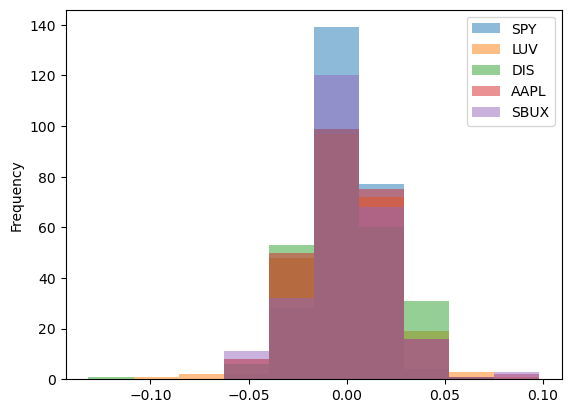

In [18]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Density'>

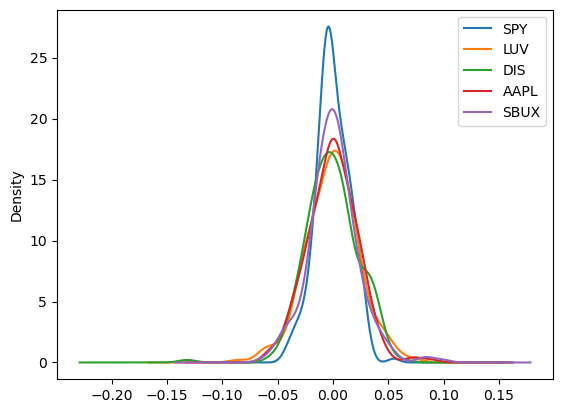

In [19]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot.density()